### CIFAR 10 IMAGE CLASSIFICATION USING STANDARD ML ALGOS

### Some Description
-> 170MB Dataset <br>
-> Cifar 10 contains 60000 32X32 color images in 10 classes (6000 images per class) <br>
-> 50000 training samples and 10000 testing samples <br>
-> Dataset divided into five training batches & one test batch with 10000 samples in each batch <br>
-> The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. <br>

Importing neccesary libraries

In [4]:
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
import cv2
import pickle

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import time

Output Class Labels -> 0 to 9

| Label | Data |
| --- | --- | 
| 0|Airplane |
| 1|Automobile |
| 2|Bird |
| 3|Cat |
| 4|Deer |
| 5|Dog |
| 6|Frog |
| 7|Horse |
| 8|Ship |
| 9|Truck |

In [6]:
classLabel = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### cifar10.load_data() -> return tuple (training X,y) , (testing X,y)

In [7]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

### each images are 32 X 32 color images -> 32 X 32 X 3

In [8]:
print(X_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [37]:
print(X_test.shape,y_test.shape)

(10000, 32, 32, 3) (10000, 1)


### VISUALIZATION OF DATA

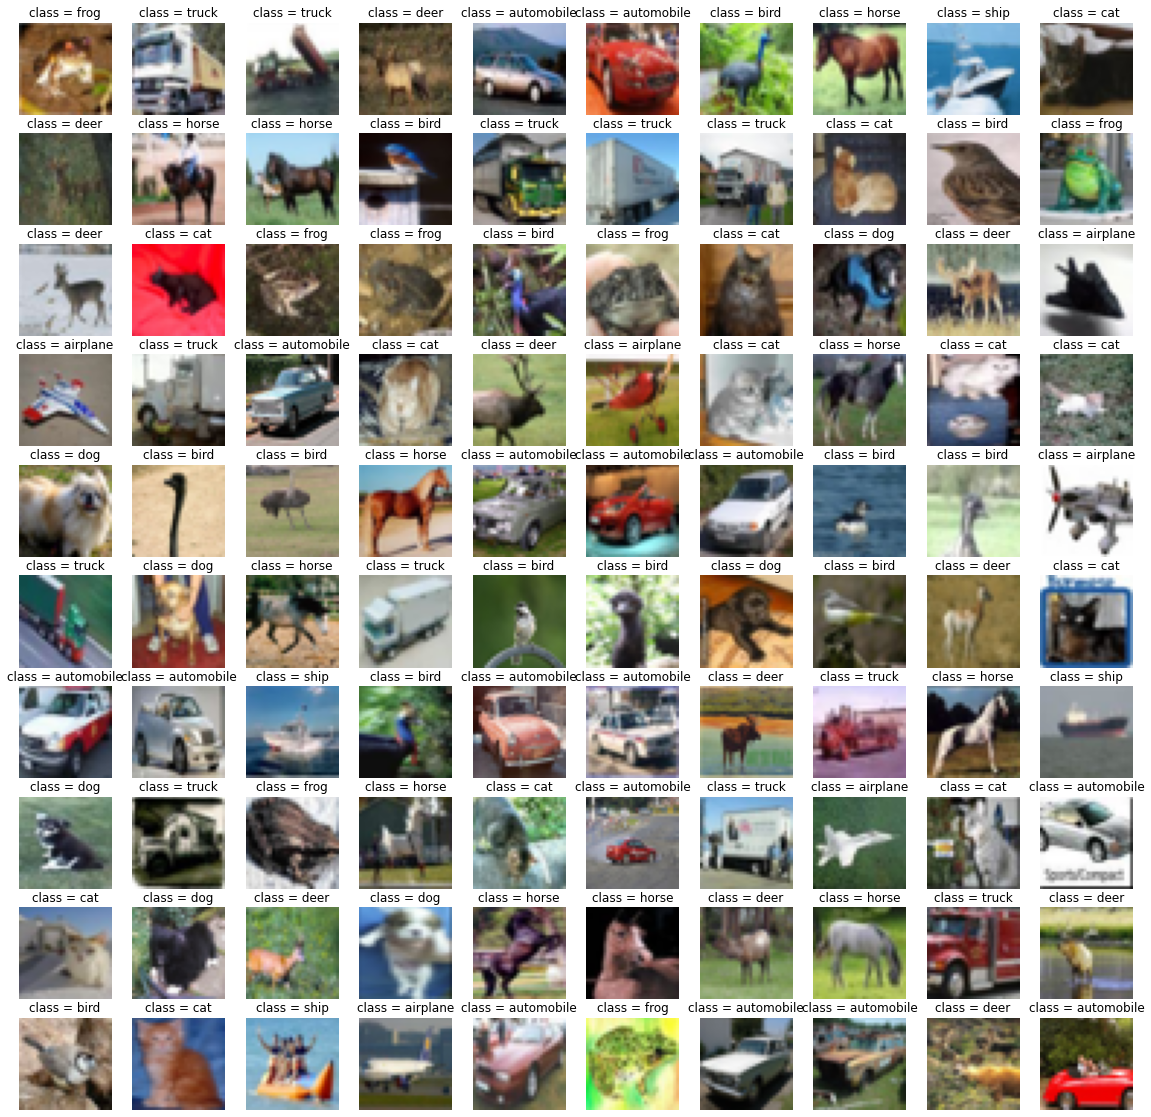

In [51]:
# visualizing some samples of each class
plt.figure(figsize=(20,20))
for i in range(100):
	plt.subplot(10,10,i+1)
	plt.imshow(X_train[i])
	plt.title(f"class = {classLabel[y_train[i][0]]}")
	plt.axis('off')
plt.show()

In [13]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [52]:
print(X_train[0].shape,X_train[0].ndim)   # each images are of 32 X 32 X 3
# images are 3-D numpy array, hence to show images from array data use plt.imshow -> displays data as an image

(32, 32, 3) 3


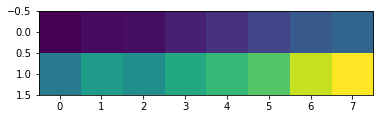

In [53]:
# just for recall
A = np.array([[10,17,19,32,45,61,78,90],[110,145,131,159,173,189,234,255]])
plt.imshow(A)

#### color images are 3-D and grey scale images are 2-D

The intensity of color ranges from 0 to 255 <br>
Color is represented as (R,G,B) <br>
Color -> (255,0,0) = red , (0,255,0) = blue , (0,0,255) = green

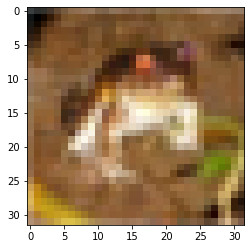

In [17]:
plt.imshow(X_train[0])

In [18]:
type(X_train) # they are numpy arrays , hence computation will be quite easy

numpy.ndarray

### Pre-Processing Data

In [9]:
# since every value in image is ranging from 0 to 255, need to normalize the data to uniform range of 0-1 , diving by 255
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train.shape
# since training and testing data is 4D, need to convert into 2D as ML algorithms (classification) is trained on 2d array
# 50000 images , each images of 32*32*3 -> hence need to convert into 50000, 32*32*3 = 3072 (50000,3072)
# hence there are 3072 features that describes an image

(50000, 32, 32, 3)

In [21]:
A = np.array([[[[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]]],[[[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]]]])
A.flatten() # completly flattens , hence reshaping is required

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
A = np.array([[[[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]]],[[[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]]]])
# 1st method
print(A.shape)
A=A.reshape(len(A),-1)
A.shape
# 2nd method
# a,b,c,d = A.shape
# A=A.reshape((a,b*c*d))
# A.shape

(2, 2, 3, 3)


(2, 18)

In [58]:
len(X_train)

50000

In [10]:
X_train1 = X_train.reshape((len(X_train),-1))
print(X_train1.shape)
X_test1 = X_test.reshape((len(X_test),-1))
print(X_test1.shape)

(50000, 3072)
(10000, 3072)


In [61]:
y_train.shape # not a column vector , hence convert

(50000, 1)

In [11]:
y_train1 = y_train.flatten()
print(y_train1.shape)
y_test1 = y_test.flatten()
print(y_test1.shape)

(50000,)
(10000,)


In [63]:
X_train1.dtype

dtype('float64')

### for better visualizing confusion matrix

In [109]:
def drawCM(cm):
    import seaborn as sns
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")

### Exploratory data analysis (EDA)
EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset. 

In [108]:
import seaborn as sns

In [111]:
print(f"Range of input features ->[{np.amin(X_train1)} , {np.amax(X_train1)}]")

Range of input features ->[0.0 , 1.0]


c:\Users\gandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\gandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


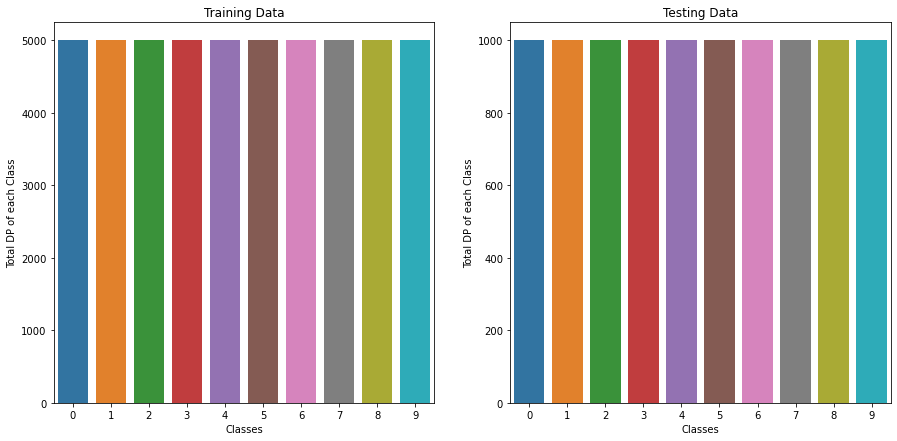

In [120]:
# DATA DISTRIBUTION
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(y_train1)
plt.xlabel("Classes")
plt.ylabel("Total DP of each Class")
plt.title("Training Data")
plt.subplot(1,2,2)
sns.countplot(y_test1)
plt.xlabel("Classes")
plt.ylabel("Total DP of each Class")
plt.title("Testing Data")
plt.show()

# BASE CLASSIFIER -> WITHOUT FEATURE EXTRACTION

### 1. KNN (K-Nearest Neigbour)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train1,y_train1)

KNeighborsClassifier()

In [78]:
pickle.dump(KNN,open("knn.pkl","wb"))

In [34]:
knn_pred = KNN.predict(X_test1)

In [35]:
acc1 = accuracy_score(knn_pred,y_test1)
print("Accuracy Score (KNN) :",accuracy_score(knn_pred,y_test1))
print("Confusion matrix (KNN)\n",confusion_matrix(knn_pred,y_test1))

Accuracy Score (KNN) : 0.3398
Confusion matrix (KNN)
 [[537 139 107  70  64  71  27  93 141 153]
 [  4 205   3   8   1   3   2  10  14  67]
 [117 110 452 234 262 227 273 181  52  98]
 [ 13  42  52 217  35 155  68  50  38  68]
 [ 59 155 226 193 514 187 314 280  54 124]
 [  7  36  34 115  21 220  37  52  16  23]
 [ 26  61  66  95  41  66 248  53  14  46]
 [  5  10   8  17   7  14   2 210   8  29]
 [225 217  49  46  53  51  28  67 655 252]
 [  7  25   3   5   2   6   1   4   8 140]]


### 2. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
DTC = DecisionTreeClassifier() # gini
DTC.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [39]:
pickle.dump(DTC,open("dtc.pkl","wb"))

In [40]:
dtc_pred = DTC.predict(X_test1)

In [41]:
acc2 = accuracy_score(dtc_pred,y_test1)
print("Accuracy Score (Decision Tree) :",accuracy_score(dtc_pred,y_test1))
print("Confusion matrix (Decision Tree)\n",confusion_matrix(dtc_pred,y_test1))

Accuracy Score (Decision Tree) : 0.2726
Confusion matrix (Decision Tree)
 [[357  70 107  68  53  53  41  78 152  87]
 [ 73 280  45  60  42  62  53  73 101 164]
 [ 83  69 219 110 168 109 137  81  47  59]
 [ 43  67  92 193  84 146 122  97  52  65]
 [ 61  73 149 103 224  86 134  95  48  50]
 [ 55  50 109 129  99 226  88 102  42  50]
 [ 45  46 104 129 131 101 270  60  27  50]
 [ 58  60  79 102 108 104  75 284  42  83]
 [154 113  42  47  43  61  28  51 384 103]
 [ 71 172  54  59  48  52  52  79 105 289]]


In [42]:
print("Classification Report (Decision Tree)\n",classification_report(dtc_pred,y_test1))

Classification Report (Decision Tree)
               precision    recall  f1-score   support

           0       0.36      0.33      0.35      1066
           1       0.28      0.29      0.29       953
           2       0.22      0.20      0.21      1082
           3       0.19      0.20      0.20       961
           4       0.22      0.22      0.22      1023
           5       0.23      0.24      0.23       950
           6       0.27      0.28      0.28       963
           7       0.28      0.29      0.28       995
           8       0.38      0.37      0.38      1026
           9       0.29      0.29      0.29       981

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



### 3. Naive Bayes Classifier

In [43]:
from sklearn.naive_bayes import GaussianNB
# since data is normally distributed

In [44]:
GNB = GaussianNB()
GNB.fit(X_train1,y_train1)

GaussianNB()

In [45]:
pickle.dump(GNB,open("gnb.pkl","wb"))

In [46]:
gnb_pred = GNB.predict(X_test1)

In [47]:
acc3 = accuracy_score(gnb_pred,y_test1)
print("Accuracy Score (Gaussian Naive Bayes) :",accuracy_score(gnb_pred,y_test1))
print("Confusion matrix (Gaussian Naive Bayes)\n",confusion_matrix(gnb_pred,y_test1))

Accuracy Score (Gaussian Naive Bayes) : 0.2976
Confusion matrix (Gaussian Naive Bayes)
 [[494 141 225 163  86 156 106 134 168 144]
 [ 20 166  24  36   8  17   2  24  41  67]
 [ 39  24  83  54  57  55  60  36  18  17]
 [ 10  31  15  76  26  51  18  41  17  20]
 [ 84  66 292 151 417 167 228 228  56  48]
 [ 34  72  48 129  38 264  46  94  83  32]
 [ 50 192 209 262 265 159 467 102  39 101]
 [  9  19  21  26  22  36  15 131   8  23]
 [200 121  54  34  50  57  19  72 471 141]
 [ 60 168  29  69  31  38  39 138  99 407]]


In [48]:
print("Classification Report (Gaussian Naive Bayes)\n",classification_report(gnb_pred,y_test1))

Classification Report (Gaussian Naive Bayes)
               precision    recall  f1-score   support

           0       0.49      0.27      0.35      1817
           1       0.17      0.41      0.24       405
           2       0.08      0.19      0.12       443
           3       0.08      0.25      0.12       305
           4       0.42      0.24      0.30      1737
           5       0.26      0.31      0.29       840
           6       0.47      0.25      0.33      1846
           7       0.13      0.42      0.20       310
           8       0.47      0.39      0.42      1219
           9       0.41      0.38      0.39      1078

    accuracy                           0.30     10000
   macro avg       0.30      0.31      0.28     10000
weighted avg       0.39      0.30      0.32     10000



### 4. Support Vector Classifier (SVC)

In [65]:
from sklearn.svm import SVC

In [ ]:
start = time.time()

svc = SVC(kernel="rbf")
svc.fit(X_train1,y_train1)

end = time.time()
print("Time Taken (SVM) :",(end-start)/60,"minutes")

In [68]:
with open("svc_rbf.pkl","wb") as f:
    pickle.dump(svc,f)

In [87]:
with open("svc_rbf.pkl","rb") as f:
    svc = pickle.load(f)
svc_pred = []
total=0
for i in range(len(X_test1)):
    total+=1
    svc_pred.append([True if svc.predict([X_test1[i]])==y_test1[i] else False])
    print(total)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [103]:
svc_pred = np.array(svc_pred)
correct = np.sum(svc_pred==True)
acc4 = correct/len(X_test1)
print(f"Accuracy Score (Support Vector Classifier) : {acc4}")

Accuracy Score (Support Vector Classifier) : 0.5437


### 5. LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver="sag",multi_class="ovr",verbose=1,n_jobs=-1) # one vs rest (ovr) , n_jobs = -1 (computation across cpu)
model = LR.fit(X_train1,y_train1)

lr_pred = LR.predict(X_test1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 426 seconds


c:\Users\gandh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 426 seconds


c:\Users\gandh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 427 seconds


c:\Users\gandh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 428 seconds
max_iter reached after 434 seconds
max_iter reached after 434 seconds


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  7.2min remaining:  4.8min


max_iter reached after 435 seconds
max_iter reached after 435 seconds
max_iter reached after 186 seconds
max_iter reached after 187 seconds


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 10.2min finished


In [ ]:
acc5 = accuracy_score(lr_pred,y_test1)
print("Accuracy Score (Logistic Regression):",accuracy_score(lr_pred,y_test1))
print("Confusion matrix (Logistic Regression):\n",confusion_matrix(lr_pred,y_test1))
print("Classification Report (Logistic Regression)\n",classification_report(lr_pred,y_test1))

Accuracy Score (Logistic Regression): 0.3979
Confusion matrix (Logistic Regression):
 [[498  64  99  50  60  38  28  52 143  70]
 [ 46 469  45  53  30  43  49  46  73 172]
 [ 45  30 281  95 124  95  73  77  20  21]
 [ 30  39  87 235  64 162 119  60  30  32]
 [ 25  29 114  53 288  86  94  79  14  21]
 [ 34  37  90 200 101 327  86  80  43  28]
 [ 21  44 138 155 166  93 464  45  16  50]
 [ 49  54  78  49 110  71  40 435  20  64]
 [172  67  45  41  29  47  20  40 531  91]
 [ 80 167  23  69  28  38  27  86 110 451]]
Classification Report (Logistic Regression)
               precision    recall  f1-score   support

           0       0.50      0.45      0.47      1102
           1       0.47      0.46      0.46      1026
           2       0.28      0.33      0.30       861
           3       0.23      0.27      0.25       858
           4       0.29      0.36      0.32       803
           5       0.33      0.32      0.32      1026
           6       0.46      0.39      0.42      1192
     

In [ ]:
with open("logr.pkl","wb") as f:
    pickle.dump(LR,f)

### 6. MULTI-LAYER PERCEPTRON (ANN)

In [ ]:
from sklearn.neural_network import MLPClassifier  
MLP = MLPClassifier(hidden_layer_sizes=(150,100,50),activation="relu",
                    solver="adam",learning_rate="constant",learning_rate_init=0.001,
                    max_iter=500,verbose=True)

nn = MLP.fit(X_train1,y_train1)

mlp_pred = MLP.predict(X_test1)

Iteration 1, loss = 1.93195297
Iteration 2, loss = 1.73195618
Iteration 3, loss = 1.65159382
Iteration 4, loss = 1.58828135
Iteration 5, loss = 1.54696330
Iteration 6, loss = 1.50931418
Iteration 7, loss = 1.48186911
Iteration 8, loss = 1.46276118
Iteration 9, loss = 1.43455671
Iteration 10, loss = 1.41627269
Iteration 11, loss = 1.40321776
Iteration 12, loss = 1.38577057
Iteration 13, loss = 1.36408053
Iteration 14, loss = 1.35575713
Iteration 15, loss = 1.34232258
Iteration 16, loss = 1.32667746
Iteration 17, loss = 1.31525044
Iteration 18, loss = 1.31076158
Iteration 19, loss = 1.29511583
Iteration 20, loss = 1.28828476
Iteration 21, loss = 1.27501831
Iteration 22, loss = 1.27073867
Iteration 23, loss = 1.25982251
Iteration 24, loss = 1.24621554
Iteration 25, loss = 1.23539156
Iteration 26, loss = 1.22691635
Iteration 27, loss = 1.22422628
Iteration 28, loss = 1.21991054
Iteration 29, loss = 1.20986444
Iteration 30, loss = 1.19547009
Iteration 31, loss = 1.19630275
Iteration 32, los

In [ ]:
acc6 = accuracy_score(mlp_pred,y_test1)
print("Accuracy Score (Artificial Neural Network):",accuracy_score(mlp_pred,y_test1))
print("Confusion matrix (Artificial Neural Network):\n",confusion_matrix(mlp_pred,y_test1))
print("Classification Report (Artificial Neural Network)\n",classification_report(mlp_pred,y_test1))

Accuracy Score (Artificial Neural Network): 0.468
Confusion matrix (Artificial Neural Network):
 [[580  58  86  27  57  28  21  58 158  69]
 [ 40 550  13  15  11  16  27  19  76 162]
 [ 72  20 397 121 178 100 111  80  31  24]
 [ 37  44 104 350  95 235  95  93  56  35]
 [ 32  11 107  61 365  68  89  74  30  18]
 [ 33  18  90 188  56 369  62 105  21  22]
 [ 38  15 109 124 136  84 541  41  17  21]
 [ 26  27  53  47  73  56  16 446  17  31]
 [ 78  56   9  22   9  16  10   8 511  47]
 [ 64 201  32  45  20  28  28  76  83 571]]
Classification Report (Artificial Neural Network)
               precision    recall  f1-score   support

           0       0.58      0.51      0.54      1142
           1       0.55      0.59      0.57       929
           2       0.40      0.35      0.37      1134
           3       0.35      0.31      0.33      1144
           4       0.36      0.43      0.39       855
           5       0.37      0.38      0.38       964
           6       0.54      0.48      0.5

In [ ]:
with open("mlp.pkl","wb") as f:
    pickle.dump(MLP,f)

### Using Ensembling Techniques <br>
Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

1) Bagging (Boostrap Agregation) -> Random Forest <br>
2) Boosting -> AdaBoost, GradientBoosting, XgBoost (Extreme Gradient Boosting)

Decision Tree -> suffers Overfitting (since decision made will work fine for train set but poorly on test set) -> Low bias, High variance <br>
Random Forest -> Combines multiple DT which reduces the variance, hence gives better solution than DT 

### 1. RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# ensemble technique -> multiple random decision tree and take majority of it

In [ ]:
RFC = RandomForestClassifier()  # n_estimators = 100 (100 random trees)
RFC.fit(X_train1,y_train1)

RandomForestClassifier()

In [ ]:
pickle.dump(RFC,open("rfc.pkl","wb"))

In [ ]:
rfc_pred = RFC.predict(X_test1)

In [ ]:
acc7 = accuracy_score(rfc_pred,y_test1)
print("Accuracy Score (Random Forest Classifier) :",accuracy_score(rfc_pred,y_test1))
print("Confusion matrix (Random Forest Classifier)\n",confusion_matrix(rfc_pred,y_test1))
# cm_rfc = confusion_matrix(rfc_pred,y_test1)
# drawCM(cm_rfc)

Accuracy Score (Random Forest Classifier) : 0.4711
Confusion matrix (Random Forest Classifier)
 [[566  31 105  56  59  34  13  42  96  47]
 [ 40 556  43  50  23  26  30  39  92 172]
 [ 57  20 325  71 148  84  87  55  18  20]
 [ 21  36  87 290  57 148  74  55  27  26]
 [ 23  16 137  73 402  78 102  91  19  15]
 [ 20  29  58 178  39 403  51  85  33  23]
 [ 25  36 122 139 142  86 573  53  16  33]
 [ 23  34  68  58  84  86  26 463  20  43]
 [164  53  27  26  25  27   7  24 601  89]
 [ 61 189  28  59  21  28  37  93  78 532]]


In [ ]:
print("Classification Report (Random Forest Classifier)\n",classification_report(rfc_pred,y_test))

Classification Report (Random Forest Classifier)
               precision    recall  f1-score   support

           0       0.57      0.54      0.55      1049
           1       0.56      0.52      0.54      1071
           2       0.33      0.37      0.34       885
           3       0.29      0.35      0.32       821
           4       0.40      0.42      0.41       956
           5       0.40      0.44      0.42       919
           6       0.57      0.47      0.52      1225
           7       0.46      0.51      0.49       905
           8       0.60      0.58      0.59      1043
           9       0.53      0.47      0.50      1126

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000



In [50]:
# # Improvised Random Forest -> using grid search
# # Multiple decision trees in which each decision trees has some bootstrap sample and some features, each tree predict and majority of predicted class is chosen
# grid = {"n_estimators":[10,100,500]}
# RFC2 = RandomForestClassifier()
# grd1 = GridSearchCV(estimator=RFC2,param_grid=grid)
# grd1.fit(X_train1,y_train1)

# rfc2_pred = RFC2.predict(X_test1)

# acc5 = accuracy_score(rfc2_pred,y_test1)
# print("Accuracy Score (Random Forest Classifier) :",accuracy_score(rfc2_pred,y_test1))
# print("Confusion matrix (Random Forest Classifier)\n",confusion_matrix(rfc2_pred,y_test1))


# Not fitted error due to grid search

### Boosting
Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers.
Firstly, a model is built from the training data.Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added. 

### 2. ADABOOST (ADAPTIVE BOOSTING)
DP which are incorrectly predicted are given more imporatance by increasing weight by LR, weight is decreased for DP which are correctly predicted

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train1,y_train1)

ada_pred = ADA.predict(X_test1)

In [52]:
acc8 = accuracy_score(ada_pred,y_test1)
print("Accuracy Score (ADA Boosting):",accuracy_score(ada_pred,y_test1))
print("Confusion matrix (ADA Boosting):\n",confusion_matrix(ada_pred,y_test1))
print("Classification Report (ADA Boosting)\n",classification_report(ada_pred,y_test1))

Accuracy Score (ADA Boosting): 0.3108
Confusion matrix (ADA Boosting):
 [[334  66  94  67  53  82  17  95 135  65]
 [ 55 325  78  97  43  58  62  57  84 131]
 [ 43  34  96  69  79  51  54  44  27  20]
 [ 34  34  57  98  43  79  57  58  14  30]
 [ 37  27 182  78 221  83 119 112  24  18]
 [ 43  49 103 166  73 259  59 103  48  21]
 [ 34  70 204 242 331 169 546 117  25  67]
 [ 68  37  90  69  93 100  39 300  17  68]
 [272 107  66  61  40  79  20  31 446  97]
 [ 80 251  30  53  24  40  27  83 180 483]]
Classification Report (ADA Boosting)
               precision    recall  f1-score   support

           0       0.33      0.33      0.33      1008
           1       0.33      0.33      0.33       990
           2       0.10      0.19      0.13       517
           3       0.10      0.19      0.13       504
           4       0.22      0.25      0.23       901
           5       0.26      0.28      0.27       924
           6       0.55      0.30      0.39      1805
           7       0.30   

In [53]:
with open("ada.pkl","wb") as f:
    pickle.dump(ADA,f)

### Gradient Boosting

In [54]:
# from sklearn.ensemble import GradientBoostingClassifier
# GBC= GradientBoostingClassifier()
# GBC.fit(X_train1,y_train1)

# gbc_pred = GBC.predict(X_test1)

In [55]:
# acc9 = accuracy_score(gbc_pred,y_test1)
# print("Accuracy Score (Gradient Boosting):",accuracy_score(gbc_pred,y_test1))
# print("Confusion matrix (Gradient Boosting):\n",confusion_matrix(gbc_pred,y_test1))
# print("Classification Report (Gradient Boosting)\n",classification_report(gbc_pred,y_test1))

In [56]:
# with open("gbc.pkl","wb") as f:
#     pickle.dump(GBC,f)

### XGBOOST (Extreme Gradient Boosting)

In [59]:
import xgboost as xgb
XGB = xgb.XGBClassifier(gamma=0.5, learning_rate=0.1, max_delta_step=0.1, 
                        max_depth=10, min_child_weight=1, n_estimators=100, 
                        nthread=4, objective='multi:logistic', reg_alpha=0.5, 
                        reg_lambda=0.8,subsample=0.8)
XGB.fit(X_train1,y_train1,verbose=1)
xgb_pred = XGB.predict(X_test1)

In [61]:
acc10 = accuracy_score(xgb_pred,y_test1)
print("Accuracy Score (XGBoost):",accuracy_score(xgb_pred,y_test1))
print("Confusion matrix (XGBoost):\n",confusion_matrix(xgb_pred,y_test1))
print("Classification Report (XGBoost)\n",classification_report(xgb_pred,y_test1))

Accuracy Score (XGBoost): 0.431
Confusion matrix (XGBoost):
 [[559  38 110  64  56  45  32  55 178  61]
 [ 43 509  43  41  28  36  52  30 105 172]
 [ 51  10 272  66 110  80  73  36  13  12]
 [ 25  48  75 271  51 137  62  74  38  40]
 [ 37  22 146  59 344  85 128  87  14  18]
 [ 25  38  95 196  62 403  53 104  42  22]
 [ 21  34 132 155 201  60 516  50  18  25]
 [ 35  27  62  64  98  96  39 400  23  34]
 [143  52  29  14  25  18   2  28 474  54]
 [ 61 222  36  70  25  40  43 136  95 562]]
Classification Report (XGBoost)
               precision    recall  f1-score   support

           0       0.56      0.47      0.51      1198
           1       0.51      0.48      0.49      1059
           2       0.27      0.38      0.32       723
           3       0.27      0.33      0.30       821
           4       0.34      0.37      0.35       940
           5       0.40      0.39      0.40      1040
           6       0.52      0.43      0.47      1212
           7       0.40      0.46      0.4

In [60]:
with open("xgb.pkl","wb") as f:
    pickle.dump(XGB,f)

# COMPARISON OF BASE ESTIMATORS

In [13]:
models = ["KNeighbors\nClassifier","DecisionTree\nClassifier","GaussianNB","Support Vector\nClassifier","Logistic\nRegression","Multi-Layer\nPerceptron","Random Forest\nClassifier","Ada Boost","XG Boost"]

with open("models1.pkl","wb") as f:
    pickle.dump(models,f)

In [14]:
with open("knn.pkl","rb") as f:
    knn = pickle.load(f)
with open("dtc.pkl","rb") as f:
    dtc = pickle.load(f)
with open("gnb.pkl","rb") as f:
    gnb = pickle.load(f)
# with open("svc.pkl") as f:
#     svc = pickle.load(f)
with open("logr.pkl","rb") as f:
    lr = pickle.load(f)
with open("mlp.pkl","rb") as f:
    mlp = pickle.load(f)
with open("rfc.pkl","rb") as f:
    rfc = pickle.load(f)
with open("ada.pkl","rb") as f:
    ada = pickle.load(f)
with open("xgb.pkl","rb") as f:
    XGB = pickle.load(f)

knn_pred = knn.predict(X_test1)
dtc_pred = dtc.predict(X_test1)
gnb_pred = gnb.predict(X_test1)
# svc_pred = svc.predict(X_test1)
lr_pred = lr.predict(X_test1)
mlp_pred = mlp.predict(X_test1)
rfc_pred = rfc.predict(X_test1)
ada_pred = ada.predict(X_test1)
xgb_pred = XGB.predict(X_test1)

NameError: name 'acc4' is not defined

In [15]:
acc1 = accuracy_score(knn_pred,y_test1)
acc2 = accuracy_score(dtc_pred,y_test1)
acc3 = accuracy_score(gnb_pred,y_test1)
acc4 = 0.5437
acc5 = accuracy_score(lr_pred,y_test1)
acc6 = accuracy_score(mlp_pred,y_test1)
acc7 = accuracy_score(rfc_pred,y_test1)
acc8 = accuracy_score(ada_pred,y_test1)
acc10 = accuracy_score(xgb_pred,y_test1)

In [16]:
accuracy = [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc10]

with open("accuracy_base.pkl","wb") as f:
    pickle.dump(accuracy,f)

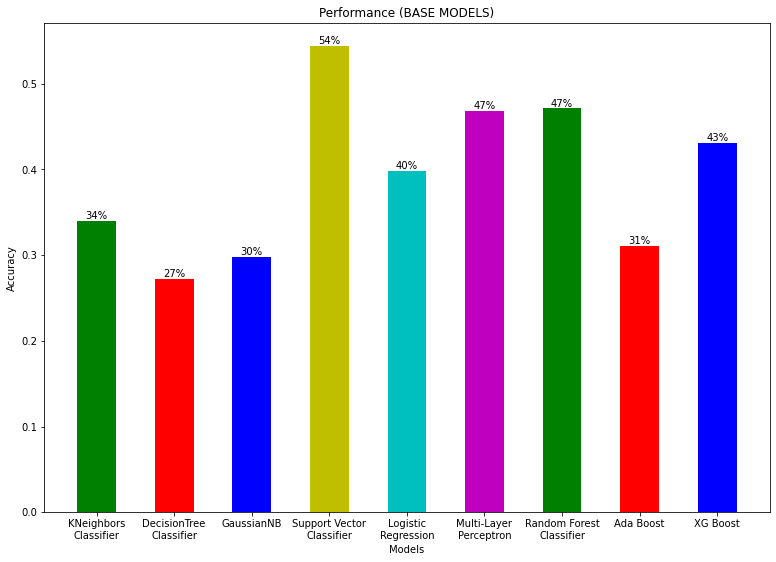

In [121]:
plt.figure(figsize=(13,9))
plt.bar(models,accuracy,width=0.5,color = ["g","r","b","y","c","m","g","r","b"])
for i in range(len(accuracy)):
    plt.text(i,accuracy[i],str(round(accuracy[i]*100))+"%",ha="center",va="bottom") # (x_coord,y_coord,value,)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Performance (BASE MODELS)")
plt.show()

### ANN SEQUENTIAL -> DEEP LEARNING

In [93]:
from tensorflow.keras.models import load_model

In [83]:
from tensorflow.keras import layers,models
ann = models.Sequential([layers.Flatten(input_shape=(32,32,3)),layers.Dense(3000,activation='relu'),layers.Dense(1000,activation='sigmoid')])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=60)

Epoch 1/60
1563/1563 [==============================] - 80s 51ms/step - loss: 1.9353 - accuracy: 0.3196
Epoch 2/60
1563/1563 [==============================] - 80s 51ms/step - loss: 1.7021 - accuracy: 0.4012
Epoch 3/60
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6165 - accuracy: 0.4342
Epoch 4/60
1563/1563 [==============================] - 81s 52ms/step - loss: 1.5574 - accuracy: 0.4544
Epoch 5/60
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5126 - accuracy: 0.4686
Epoch 6/60
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4749 - accuracy: 0.4851
Epoch 7/60
1563/1563 [==============================] - 76s 49ms/step - loss: 1.4422 - accuracy: 0.4948
Epoch 8/60
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4082 - accuracy: 0.5092
Epoch 9/60
1563/1563 [==============================] - 75s 48ms/step - loss: 1.3815 - accuracy: 0.5208
Epoch 10/60
1563/1563 [==============================] - 75s 48m

In [105]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_3 (Dense)             (None, 1000)              3001000   
                                                                 
Total params: 12,220,000
Trainable params: 12,220,000
Non-trainable params: 0
_________________________________________________________________


In [106]:
ann.save("ann.h")

INFO:tensorflow:Assets written to: ann.h\assets


In [104]:
# poor on test data
scores = ann.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.5282 - accuracy: 0.5146


In [ ]:
print(ann.metrics_names[1],scores[1])